In [36]:
import os
import importlib
from collections import defaultdict

In [150]:
import torch
from super_glue.models.matching import Matching

In [151]:
Matching()

Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


Matching(
  (superpoint): SuperPoint(
    (relu): ReLU(inplace=True)
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv1a): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2a): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2b): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3a): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3b): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4a): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4b): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (convPa): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (convPb): Conv2d(256, 65, kernel_size=(1, 1), stride=(1, 1))
    (convDa): Conv2d(128, 256, kernel_size=(3, 3), 

In [37]:
data_source_path = 'tmp'
split = 'train'

In [5]:
data_path = os.path.join(data_source_path, split)
scenes = []

images = {}
images_by_category = defaultdict(list)

for path, dirs, files in os.walk(data_path):
    #print(path, dirs, files)
    scenes = dirs
    break

for scene in scenes:
    dir_path = os.path.join(data_path, scene, 'images')
    for file in os.listdir(dir_path):
        if file.endswith('jpg'):
            file_path = os.path.join(dir_path, file)
            #print(scene, file_path)
            image_id = file.replace('.jpg', '')
            images[image_id] = file_path
            images_by_category[scene].append(image_id)

images_by_category


defaultdict(list,
            {'brandenburg_gate': ['10624116_2746543073',
              '96174448_2036661198',
              '82979608_7624874030',
              '02035158_8518636650',
              '23898581_3418292777',
              '60824110_1469539304',
              '66531492_8648763289',
              '05712502_4051278060',
              '48127186_5425905321',
              '99790559_8115599774',
              '05714706_2362913557',
              '43929418_4177129462',
              '72124445_1515477052',
              '37403694_5070563509',
              '97371403_4823878472',
              '88312545_2361506957',
              '59826471_8014732885',
              '72565529_3540024224',
              '38600512_2168650655',
              '49325118_2768773629',
              '51846360_3107416213',
              '31057084_3577644495',
              '78762094_501186144',
              '77174563_5012249156',
              '09840944_156579676',
              '33115046_5083480634',
  

In [1]:
import importlib
import dataset
importlib.reload(dataset)
from dataset import VisualDataset
import matplotlib.pyplot as plt 
import random
from torch.utils.data import DataLoader, random_split
import numpy as np
import torch

In [149]:
torch.load('tmp/features/02760416_4808737899-02715140_4709882483.pt')

(array([[-1.82893233e-08, -1.75122141e-05,  7.06860215e-03],
        [ 1.74308322e-05, -5.81490701e-07, -7.80711439e-03],
        [-7.10697781e-03,  5.65223457e-03,  1.00000000e+00]]),
 array([False, False,  True, False, False,  True,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False,
         True, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True, False,  True, False,
        False, False, False, False, False, False, False,  True, False,
        False, False,  True,  True, False,  True, False, False, False,
        False, False,  True, False

In [56]:
from dataset import VisualDataset

In [57]:
dataset = VisualDataset(pair_covis_required=0.1, max_pairs_per_scene=20000)

Data is already extracted, skipping unzip_files
Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


In [75]:
dataset.pair_covis[dataset.pair_covis['covisibility'] <= 0.1]['fundamental_matrix'].apply(lambda x: np.array([float(b) for b in str(x).split(' ')])).mean(axis=0)

array([ 5.87371944e-02,  1.89671885e+00, -8.64428192e+02, -2.49237048e+00,
        5.45128984e-02, -1.67631108e+03,  2.36477570e+03,  8.41240296e+02,
       -1.02309918e+06])

In [16]:
def FlattenMatrix(M, num_digits=8):
    '''Convenience function to write CSV files.'''
    return ' '.join([f'{v:.{num_digits}e}' for v in M.flatten()])


str(FlattenMatrix(np.array([x for x in dataset.pair_covis['fundamental_matrix'].apply(lambda x: np.array([float(y) for y in x.split(' ')])).values]).mean(axis=0)))


'4.08927885e-03 5.50701253e-01 -3.53248416e+02 -1.57769697e+00 2.88557291e-02 6.82600577e+02 1.19868076e+03 -2.02438386e+02 -3.77627213e+05'

In [39]:
import torch
data = torch.load('data.pt')
len(data)

68

In [38]:
[x[1] for x in data]

[tensor([[-4.4584e-03, -2.6196e-02, -2.1958e+01],
         [-2.8671e-02, -2.6923e-03, -5.1377e+02],
         [ 7.9814e+01,  6.5099e+02, -1.6023e+04]]),
 tensor([[-7.6801e-01,  9.9420e+00, -6.8959e+03],
         [-1.8192e+01,  2.9012e+00, -1.3068e+04],
         [ 1.1301e+04,  1.2185e+04, -9.1892e+05]]),
 tensor([[-1.5094e-02,  2.0711e+00, -1.3420e+03],
         [-2.7447e+00,  6.9705e-01, -1.6448e+03],
         [ 2.4899e+03,  2.2016e+03, -3.3516e+05]]),
 tensor([[-4.9557e-03,  1.5071e+00, -7.6110e+02],
         [-1.4591e+00,  1.2269e-02,  6.4916e+02],
         [ 1.1632e+03, -4.1662e+02, -3.1144e+05]]),
 tensor([[ 2.3084e-02, -2.7391e+00,  1.8585e+03],
         [ 2.3973e+00, -4.9650e-01, -2.5657e+03],
         [-1.1607e+03,  2.7168e+03, -4.6328e+05]]),
 tensor([[-1.9793e-02,  4.8650e-01, -1.4847e+02],
         [-5.0546e-01, -2.9674e-02,  2.6824e+02],
         [ 4.2411e+02, -5.0444e+02, -5.2508e+04]]),
 tensor([[-1.9457e+00,  1.3386e+01, -6.7805e+03],
         [-1.3062e+01, -2.7144e+00,  1

In [24]:
torch.from_numpy(np.stack([x[0] for x in data]))

tensor([[[ 6.6678e-07,  1.0264e-06, -3.2130e-04],
         [-5.1168e-06,  3.0166e-06, -2.9843e-03],
         [ 4.4861e-03,  4.9983e-03, -1.2075e+00]],

        [[-2.8302e-07,  4.5337e-06, -6.8130e-03],
         [-5.0575e-06,  3.2315e-09,  1.3443e-03],
         [ 5.1933e-03, -1.1922e-03,  4.2603e-01]],

        [[ 8.0838e-08,  2.8504e-06, -2.7555e-03],
         [-2.0456e-06, -6.7308e-07, -2.4837e-03],
         [ 2.1119e-03,  3.0006e-03,  2.3419e-01]],

        [[-1.0065e-08, -1.3532e-06,  5.7056e-04],
         [ 1.5776e-06,  1.0101e-08, -4.5804e-03],
         [-6.1421e-04,  4.6267e-03, -6.9099e-02]],

        [[ 5.6201e-09,  5.1459e-07, -4.3274e-04],
         [-2.5873e-06,  2.0083e-07, -3.0610e-03],
         [ 1.9664e-03,  3.8891e-03, -1.1217e+00]],

        [[ 3.8575e-07,  6.0982e-06, -5.7582e-03],
         [-5.7722e-06,  1.8073e-08,  3.3195e-03],
         [ 6.0551e-03, -4.1087e-03,  2.3002e-01]],

        [[ 3.4651e-07,  1.7942e-06, -1.7783e-03],
         [-4.2678e-06, -6.9374e-07,  7

In [54]:
width0, height0 = 1062, 782
width1, height1 = 980, 734 

[int(width0*0.4), int(height0*0.4)], [int(width1*0.4), int(height1*0.4)]

([424, 312], [392, 293])

In [45]:
840 / 782

1.0741687979539642

In [51]:
782 / 1062

0.736346516007533

In [14]:
F_true_batch.shape

AttributeError: 'list' object has no attribute 'shape'

In [12]:
F_pred.shape

(3, 3)

In [ ]:
import torch

In [144]:
df['gt'] = df['fundamental_matrix'].apply(lambda x: [float(z) for z in x.split(' ')])
df['pred_path'] = df['pair'].apply(lambda x: os.path.join('tmp', 'pairs_cv2pred', f"{x}.pt"))
df['pred'] = df['pred_path'].apply(lambda x: torch.load(x).flatten() if os.path.exists(x) else None)
df

pair  covisibility  \
0        92199010_423632152-57504314_2114264842         0.583   
1       11220321_6429817645-04563674_4259679500         0.335   
2        16969359_2666887624-13516917_263156785         0.320   
3      91333167_11075684623-81677974_8097325090         0.570   
4      58190554_4740116131-19142233_13568335013         0.734   
...                                         ...           ...   
79291   84056637_8972124892-55708664_8250830435         0.929   
79292     87537519_5722191686-80544067_74069924         0.422   
79293    46879269_223405666-18063659_8139457980         0.304   
79294    64241156_525538963-34163229_5127201841         0.456   
79295    53543924_286554986-08507139_7168341023         0.152   

                                      fundamental_matrix  \
0      -1.02133555e-01 -2.07282447e+00 8.05199275e+02...   
1      -2.57797813e-01 5.37321303e+00 -2.44037526e+03...   
2      2.88181814e-02 5.20517371e+00 -3.04288482e+03 ...   
3      -1.60891645e-02 -5.06985243e-01 3.61936481e+02...   
4      -1.46985315e-01 -2.20024726e+00 2.05308276e+03...   
...                                                  ...   
79291  3.63386223e-02 9.61430498e-01 -1.71347323e+02 ...   
79292  1.03896557e-01 -1.18959432e-01 -2.30111134e+02...   
79293  -1.12127178e+00 7.63592816e+00 -3.62993182e+03...   
79294  -1.97295002e-01 -3.71232599e+00 5.45089233e+03...   
79295  2.91014482e-02 -4.50328698e-01 4.25839098e+02 ...   

                        im1                   im2  \
0        92199010_423632152   57504314_2114264842   
1       11220321_6429817645   04563674_4259679500   
2       16969359_2666887624    13516917_263156785   
3      91333167_11075684623   81677974_8097325090   
4       58190554_4740116131  19142233_13568335013   
...                     ...                   ...   
79291   84056637_8972124892   55708664_8250830435   
79292   87537519_5722191686     80544067_74069924   
79293    46879269_223405666   18063659_8139457980   
79294    64241156_525538963   34163229_5127201841   
79295    53543924_286554986   08507139_7168341023   

                                                      gt  \
0      [-0.102133555, -2.07282447, 805.199275, 0.2509...   
1      [-0.257797813, 5.37321303, -2440.37526, -5.739...   
2      [0.0288181814, 5.20517371, -3042.88482, -5.714...   
3      [-0.0160891645, -0.506985243, 361.936481, 0.43...   
4      [-0.146985315, -2.20024726, 2053.08276, -0.729...   
...                                                  ...   
79291  [0.0363386223, 0.961430498, -171.347323, -0.98...   
79292  [0.103896557, -0.118959432, -230.111134, -0.33...   
79293  [-1.12127178, 7.63592816, -3629.93182, -6.5913...   
79294  [-0.197295002, -3.71232599, 5450.89233, 3.1998...   
79295  [0.0291014482, -0.450328698, 425.839098, -0.31...   

                                               pred_path  \
0      tmp/pairs_cv2pred/92199010_423632152-57504314_...   
1      tmp/pairs_cv2pred/11220321_6429817645-04563674...   
2      tmp/pairs_cv2pred/16969359_2666887624-13516917...   
3      tmp/pairs_cv2pred/91333167_11075684623-8167797...   
4      tmp/pairs_cv2pred/58190554_4740116131-19142233...   
...                                                  ...   
79291  tmp/pairs_cv2pred/84056637_8972124892-55708664...   
79292  tmp/pairs_cv2pred/87537519_5722191686-80544067...   
79293  tmp/pairs_cv2pred/46879269_223405666-18063659_...   
79294  tmp/pairs_cv2pred/64241156_525538963-34163229_...   
79295  tmp/pairs_cv2pred/53543924_286554986-08507139_...   

                                                    pred  
0      [5.0315197302039076e-08, 1.3918707978553057e-0...  
1                                                   None  
2                                                   None  
3                                                   None  
4      [2.0863271980275405e-06, -5.357726591417308e-0...  
...                                                  ...  
79291  [-4.5849630635378215e-05, 0.00045983774966

In [145]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom Dataset
class CalibrationDataset(Dataset):
    def __init__(self, df):
        df = df[~df['pred'].isna()]
        self.inputs = torch.tensor([list(x) for x in df['pred'].values], dtype=torch.float32)
        self.ground_truths = torch.tensor([list(x) for x in df['gt'].values], dtype=torch.float32)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.ground_truths[idx]

# Create dataset and data loader
dataset = CalibrationDataset(df)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

In [146]:
import torch.nn as nn

# Define the neural network
class CalibrationModel(nn.Module):
    def __init__(self):
        super(CalibrationModel, self).__init__()
        self.fc1 = nn.Linear(9, 128)  # Increase layer size
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 9)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = CalibrationModel()


In [157]:
test_df = pd.read_csv('tmp/test.csv')
test_df

sample_id  \
0      st_peters_square;99669631_2524741025-73248999_...   
1      st_peters_square;61838905_5998204213-31114085_...   
2      st_peters_square;61888375_5977160696-31114085_...   
3      st_peters_square;61888375_5977160696-61838905_...   
4      st_peters_square;73248999_6032243612-50640401_...   
...                                                  ...   
18835  notre_dame_front_facade;97270767_81833198-8701...   
18836  notre_dame_front_facade;97270767_81833198-8779...   
18837  notre_dame_front_facade;97270767_81833198-8842...   
18838  notre_dame_front_facade;97270767_81833198-9517...   
18839  notre_dame_front_facade;97270767_81833198-9535...   

                      batch_id           image_1_id            image_2_id  
0             st_peters_square  99669631_2524741025   73248999_6032243612  
1             st_peters_square  61838905_5998204213   31114085_5998747630  
2             st_peters_square  61888375_5977160696   31114085_5998747630  
3             st_peters_square  61888375_5977160696   61838905_5998204213  
4             st_peters_square  73248999_6032243612   50640401_5932753684  
...                        ...                  ...                   ...  
18835  notre_dame_front_facade    97270767_81833198    87016309_316040505  
18836  notre_dame_front_facade    97270767_81833198     87791294_86765915  
18837  notre_dame_front_facade    97270767_81833198   88420798_4886011265  
18838  notre_dame_front_facade    97270767_81833198   95177872_8272975292  
18839  notre_dame_front_facade    97270767_81833198  95357069_10894925523  

[18840 rows x 4 columns]

In [155]:
submission_df = pd.read_csv('submission.csv')
submission_df   

sample_id                                 fundamental_matrix
0              0  -7.98107338e-08 -1.45118516e-06 4.93564216e-04...
1              1  9.65219462e-09 5.66377353e-07 -4.75286561e-04 ...
2              2  7.02029962e-09 3.58639369e-07 -3.02021948e-04 ...
3              3  -6.50299625e-09 -1.12076059e-06 5.22291374e-04...
4              4  -2.24331415e-07 1.28139079e-05 -5.88918830e-03...
...          ...                                                ...
18835      18835  2.63325645e-08 -6.85890033e-07 2.92728675e-04 ...
18836      18836  6.08454735e-07 -2.75999773e-05 1.25065829e-02 ...
18837      18837  5.87675906e-07 9.74919117e-06 -7.50651883e-03 ...
18838      18838  5.00587150e-07 -3.80057273e-06 1.30366165e-03 ...
18839      18839  0.00000000e+00 0.00000000e+00 0.00000000e+00 0...

[18840 rows x 2 columns]

In [160]:
submission_df['sample_id'] = test_df['sample_id']
submission_df.to_csv('submission_new.csv', index=False)

In [147]:
import torch.optim as optim

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [148]:
# Training loop with validation
epochs = 100
for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for batch_inputs, batch_ground_truths in train_loader:
        # Forward pass
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_ground_truths)
        train_loss += loss.item()
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_inputs, batch_ground_truths in val_loader:
            outputs = model(batch_inputs)
            loss = criterion(outputs, batch_ground_truths)
            val_loss += loss.item()
    
    # Average losses for the epoch
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    # Print losses every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch [10/100], Train Loss: 141889734523.4954, Val Loss: 134617195038.9426
Epoch [20/100], Train Loss: 140117534923.4272, Val Loss: 132978396482.8628
Epoch [30/100], Train Loss: 139085693562.2119, Val Loss: 132679169971.1445
Epoch [40/100], Train Loss: 138755912136.5216, Val Loss: 132619463514.7347
Epoch [50/100], Train Loss: 138377201616.8871, Val Loss: 132303836950.8142
Epoch [60/100], Train Loss: 138038781474.4281, Val Loss: 132616908358.2358
Epoch [70/100], Train Loss: 138167414897.3431, Val Loss: 131871479059.0108
Epoch [80/100], Train Loss: 137770683256.6888, Val Loss: 131602076261.7691
Epoch [90/100], Train Loss: 137760355738.0771, Val Loss: 133195830159.7548
Epoch [100/100], Train Loss: 137403424693.3417, Val Loss: 132896866411.2526


In [ ]:
# Final validation evaluation
model.eval()
val_loss = 0.0
with torch.no_grad():
    for batch_inputs, batch_ground_truths in val_loader:
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_ground_truths)
        val_loss += loss.item()

val_loss /= len(val_loader)
print(f'Final Validation Loss: {val_loss:.4f}')


In [116]:
len(dataset.scene_cal) * 50

600

In [117]:
len(dataset)

600

In [95]:
estimated, actual = dataset[8]

In [96]:
estimated, actual

(tensor([-2.4285e-09, -2.9391e-08, -4.6406e-06,  1.7887e-08,  1.4669e-10,
         -1.1308e-04,  1.3565e-05,  1.0937e-04, -1.1383e-02]),
 tensor([-3.8589e-02,  7.1925e-01, -7.0130e+02, -7.9198e-01,  1.1321e-02,
         -1.2384e+02,  6.7960e+02,  1.7660e+02, -7.3964e+04]))

In [49]:
batch_size = 1
train_dataset, val_dataset, test_dataset = random_split(dataset, [0.7, 0.15, 0.15])
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [51]:
for batch in train_loader:
    print('got here')
    torch.save(batch, 'train.pt')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/shirabroner/Documents/DataScience/venv/Default/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/2z/c6gqg_851559vjqn8pzyq3f80000gn/T/ipykernel_7811/1218156146.py", line 1, in <module>
    for batch in train_loader:
  File "/Users/shirabroner/Documents/DataScience/venv/Default/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 631, in __next__
    data = self._next_data()
  File "/Users/shirabroner/Documents/DataScience/venv/Default/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 675, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/Users/shirabroner/Documents/DataScience/venv/Default/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "/Users/shirabroner

In [33]:
for idx in train_loader:
    idx = idx.item()
    print(idx)

41921
7721
37588
28942
51773
594
32055
65191
869
37740
75988
62949
28543
53789
36206
41813
21979
66097
53869
17741
13817
8404
36657
5580
28062
14662
19612
35671
5805
66838
10445
33578
15437
62873
13325
24471
31980
72492
29258
52388
22762
29499
13792
4947
23106
3061
72408
52394
11308
7388
72229
53279
18113
3970
4246
53014
32887
33494
47275
69778
75074
15307
15643
43421
74175
53125
15800
18849
70567
35347
76078
57985
37923
70262
24363
64225
15025
29757
22142
6206
49040
13727
71704
69152
49956
27757
56504
42260
39689
71236
2190
3514
11069
75109
38699
70016
23088
37476
79170
38128
67469
12960
14899
58535
68882
69696
32995
50748
65234
11199
58607
77604
31559
73418
52043
64457
10181
64354
25980
2356
60625
75924
27779
15769
48935
46253
10087
4084
72863
28077
15126
65160
51150
16418
38658
35160
61911
56615
23252
16382
58031
44513
66136
79193
64333
51466
15726
69185
39761
72231
70720
16681
35363
19286
12881
59577
45493
27402
51948
62876
43715
9811
70936
2432
60571
65650
71037
35048
64608
25830


In [8]:
dataset.scene_cal

{'brandenburg_gate':                 image_id                                  camera_intrinsics  \
 0    28048887_9705734840  9.73220764e+02 0.00000000e+00 3.78500000e+02 0...   
 1    82795354_2835662202  1.16166406e+03 0.00000000e+00 5.18000000e+02 0...   
 2    20050853_9360512514  2.58397583e+03 0.00000000e+00 4.53500000e+02 0...   
 3    65593803_7168341735  8.26868530e+02 0.00000000e+00 5.21000000e+02 0...   
 4    73131946_5967189750  8.42626709e+02 0.00000000e+00 5.36500000e+02 0...   
 ..                   ...                                                ...   
 118  71210930_8368609525  1.55011121e+03 0.00000000e+00 5.08500000e+02 0...   
 119  48881630_6195994710  1.50149487e+03 0.00000000e+00 5.22000000e+02 0...   
 120  80116231_6025655620  7.59647278e+02 0.00000000e+00 5.20500000e+02 0...   
 121  99451773_2694323455  1.04725183e+03 0.00000000e+00 5.17000000e+02 0...   
 122  63229395_2704362565  5.17219775e+03 0.00000000e+00 5.08000000e+02 0...   
 
                  

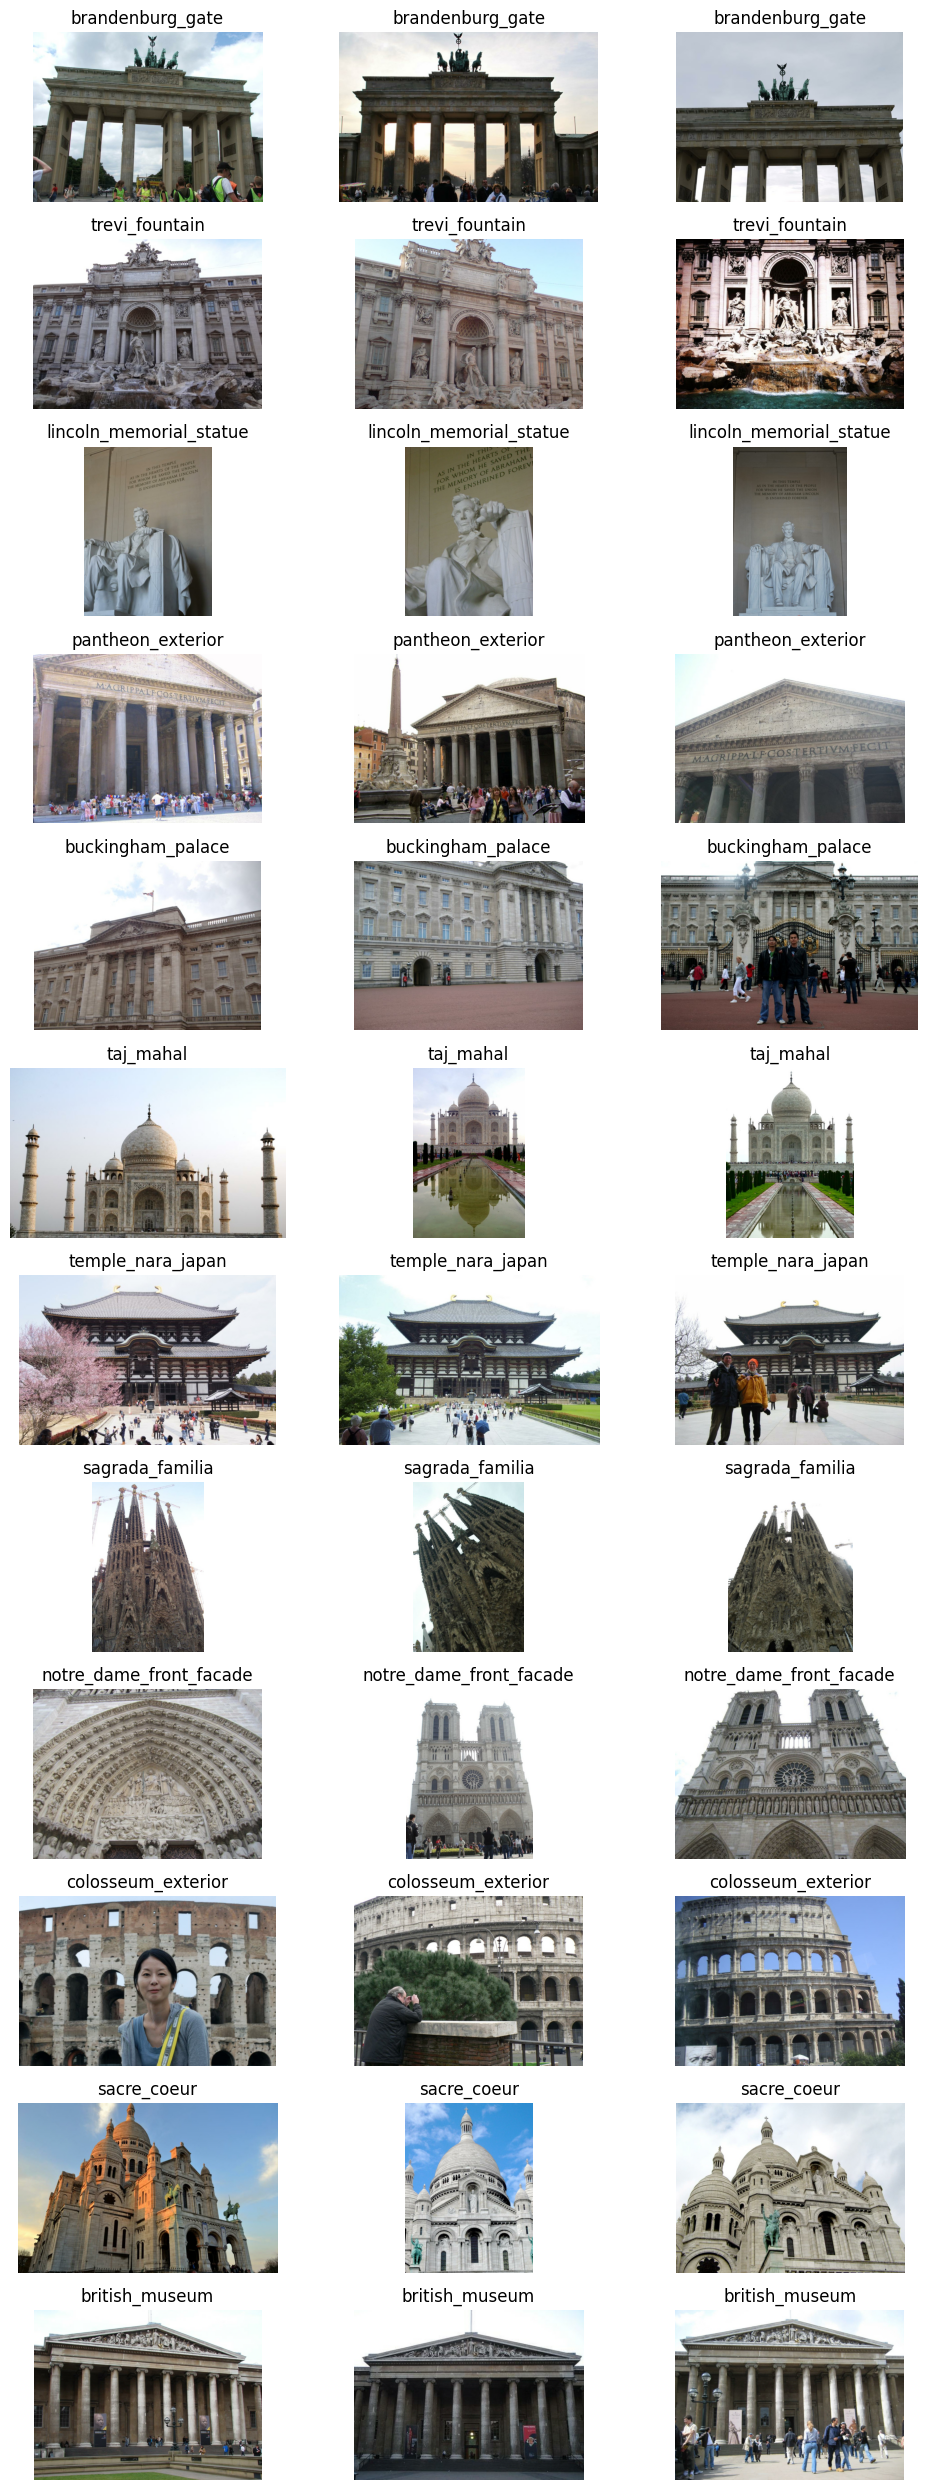

In [ ]:
def visualize_samples(dataset:VisualDataset, num_samples_per_label=3):
    indices = []
    fig, axes = plt.subplots(len(dataset.scene_image.keys()), num_samples_per_label, figsize=(10, 25))
    row = 0
    for label in dataset.scene_image.keys():
      indices = random.sample(dataset.scene_image[label], num_samples_per_label)
      for i, idx in enumerate(indices):
        image = dataset.load_image(idx)
        axes[row, i].imshow(image)
        axes[row, i].set_title(f"{label}")
        axes[row, i].axis('off')
      row += 1

    plt.tight_layout()
    plt.show()

visualize_samples(dataset)

67


defaultdict(list,
            {'brandenburg_gate': ['10624116_2746543073',
              '96174448_2036661198',
              '82979608_7624874030',
              '02035158_8518636650',
              '23898581_3418292777',
              '60824110_1469539304',
              '66531492_8648763289',
              '05712502_4051278060',
              '48127186_5425905321',
              '99790559_8115599774',
              '05714706_2362913557',
              '43929418_4177129462',
              '72124445_1515477052',
              '37403694_5070563509',
              '97371403_4823878472',
              '88312545_2361506957',
              '59826471_8014732885',
              '72565529_3540024224',
              '38600512_2168650655',
              '49325118_2768773629',
              '51846360_3107416213',
              '31057084_3577644495',
              '78762094_501186144',
              '77174563_5012249156',
              '09840944_156579676',
              '33115046_5083480634',
  

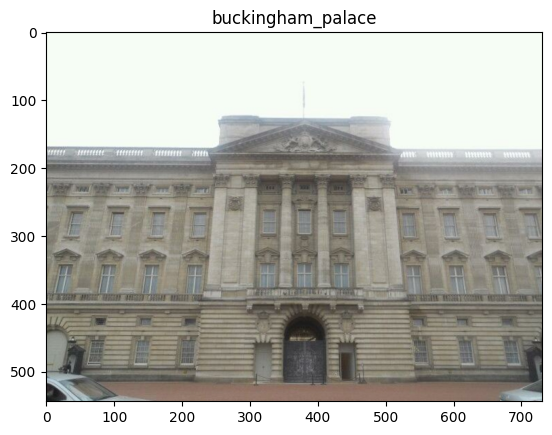

In [63]:
image_id, scene = dataset[67]
image = dataset.load_image(image_id)

plt.title(scene)
plt.imshow(image)

dataset.scene_image

In [2]:
df = dataset.scene_cal['taj_mahal']

NameError: name 'dataset' is not defined

In [81]:
rotation_matrix = df.iloc[0]['rotation_matrix']
np.array([float(x) for x in rotation_matrix.split(' ')]).reshape(3,3)

array([[ 0.9690993 , -0.01314286, -0.24632054],
       [ 0.06409142,  0.97769988,  0.19998809],
       [ 0.23819914, -0.20959535,  0.94833062]])

In [5]:
import torch

# Example Inputs
keypoints0 = torch.tensor([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100]])  # [5, 2]
keypoints1 = torch.tensor([[11, 21], [31, 41], [51, 61], [71, 81], [91, 101]])  # [5, 2]
matches0 = torch.tensor([2, -1, 4, 1, -1])  # Match indices for keypoints0 (-1 means no match)

# Step 1: Identify valid matches (matches0 != -1)
valid_mask = matches0 != -1              # Mask: [True, False, True, True, False]
valid_indices = torch.nonzero(valid_mask).squeeze(1)  # Indices of valid matches: [0, 2, 3]

# Step 2: Filter keypoints0 for valid matches
filtered_keypoints0 = keypoints0[valid_indices]       # Keep keypoints with matches

# Step 3: Reorganize keypoints1 based on matched indices
matched_indices_in_kp1 = matches0[valid_indices]      # [2, 4, 1] → indices in keypoints1
reorganized_keypoints1 = keypoints1[matched_indices_in_kp1]  # Select corresponding keypoints

# ✅ Final Output

print("Filtered Keypoints0:\n", filtered_keypoints0)
print("Reorganized Keypoints1:\n", reorganized_keypoints1)


Filtered Keypoints0:
 tensor([[10, 20],
        [50, 60],
        [70, 80]])
Reorganized Keypoints1:
 tensor([[ 51,  61],
        [ 91, 101],
        [ 31,  41]])


In [18]:
import cv2
img1_path = 'tmp/train/sagrada_familia/images/36009638_559975512.jpg'
img2_path = 'tmp/train/sagrada_familia/images/34169301_5802403584.jpg'

im0, im1 = cv2.imread(img1_path), cv2.imread(img2_path)
size0 = cv2.imread(img1_path).shape
size1 = cv2.imread(img2_path).shape

size0, size1

((1046, 686, 3), (738, 993, 3))

In [30]:
import cv2
import numpy as np

def resize_to_largest_common_size(img, final_size, scale):
    """ Resizes an image using a common scale and pads it to final size. """
    h, w = img.shape[:2]
    
    # Compute new dimensions
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Compute padding to match final size
    pad_w = (final_size[0] - new_w) // 2
    pad_h = (final_size[1] - new_h) // 2

    # Apply padding symmetrically
    padded = cv2.copyMakeBorder(resized, pad_h, final_size[1] - new_h - pad_h,
                                pad_w, final_size[0] - new_w - pad_w,
                                cv2.BORDER_CONSTANT, value=[0, 0, 0])

    return padded

def scale_fundamental_matrix(F, scale):
    """ Adjusts the fundamental matrix after uniform image scaling. """
    T = np.array([[scale, 0, 0], [0, scale, 0], [0, 0, 1]])  # Uniform scaling matrix
    return T.T @ F @ T  # Apply transformation

# Load images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Get original sizes
h1, w1 = img1.shape[:2]  # Image 1 size
h2, w2 = img2.shape[:2]  # Image 2 size

# Compute max possible size
max_w, max_h = max(w1, w2), max(h1, h2)

# Compute scaling factors
scale1 = min(max_w / w1, max_h / h1)
scale2 = min(max_w / w2, max_h / h2)

# Choose a single common scale factor (smallest one)
common_scale = min(scale1, scale2)

# Compute final size after scaling
final_w, final_h = int(w1 * common_scale), int(h1 * common_scale)

# Resize both images using the same scale factor and pad them
img1_resized = resize_to_largest_common_size(img1, (final_w, final_h), common_scale)
img2_resized = resize_to_largest_common_size(img2, (final_w, final_h), common_scale)

# Ensure both images are exactly the same size
assert img1_resized.shape == img2_resized.shape, "Final image sizes do not match!"

# Example fundamental matrix (computed from original images)
F_original = np.array([[0.000001, 0, -0.001], [0, 0.000001, -0.002], [-0.001, -0.002, 1]])

# Adjust fundamental matrix
F_scaled = scale_fundamental_matrix(F_original, common_scale)

# Print results
print("Common Scale Factor:", common_scale)
print("Original Fundamental Matrix:\n", F_original)
print("Scaled Fundamental Matrix:\n", F_scaled)
print("Final Resized Image Shape:", img1_resized.shape, img2_resized.shape)


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/core/src/copy.cpp:1026: error: (-215:Assertion failed) top >= 0 && bottom >= 0 && left >= 0 && right >= 0 && _src.dims() <= 2 in function 'copyMakeBorder'


In [ ]:
cv2.copyMakeBorder(im0, 1200 - im0.shape[0], 0, left, 0, borderType)

In [1]:
import cv2
import numpy as np

# read image
img = im0
old_image_height, old_image_width, channels = img.shape

# create new image of desired size and color (blue) for padding
new_image_width = 1200
new_image_height = 1200
color = (255,0,0)
result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

# compute center offset
x_center = (new_image_width - old_image_width) // 2
y_center = (new_image_height - old_image_height) // 2

# copy img image into center of result image
result[y_center:y_center+old_image_height, 
       x_center:x_center+old_image_width] = img

# view result
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save result
cv2.imwrite("lena_centered.jpg", result)

NameError: name 'im0' is not defined

In [16]:
def FlattenMatrix(M, num_digits=8):
    '''Convenience function to write CSV files.'''
    return ' '.join([f'{v:.{num_digits}e}' for v in M.flatten()])


str(FlattenMatrix(np.array([0] * 9)))

'0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00'